## Is ANN or CNN is better for image classification ?

### Importing libraries 

In [71]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [72]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [73]:
x_train.shape

(50000, 32, 32, 3)

In [74]:
y_train.shape

(50000, 1)

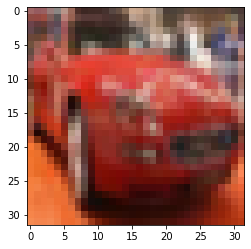

In [75]:
plt.imshow(x_train[5])

In [76]:
y_train[5][0]

1

In [77]:
classes = ["airplane", "automobile", "dog", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [78]:
classes[y_train[5][0]]

'automobile'

In [88]:
# scaling data

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [89]:
# hot encoding

y_train_categorical = keras.utils.to_categorical(y_train, num_classes = 10)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes = 10)

In [90]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [91]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### Building ANN with 5 epochs

In [114]:
# building and training model

ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])
ann.compile (optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'] )
ann.fit(x_train_scaled, y_train_categorical, epochs = 5) #my processor is bit slow so i used less epochs

Epoch 1/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.9630 - accuracy: 0.3298
Epoch 2/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6824 - accuracy: 0.4002
Epoch 3/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6173 - accuracy: 0.4257
Epoch 4/5
1563/1563 [==============================] - 60s 39ms/step - loss: 1.5623 - accuracy: 0.4447
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5299 - accuracy: 0.4573


In [116]:
ann_y_predict = model.predict(x_test_scaled)
ann_y_predict

313/313 [==============================] - 3s 11ms/step


array([[0.42774716, 0.58526444, 0.61332285, ..., 0.06072808, 0.60851353,
        0.12308096],
       [0.9161433 , 0.990886  , 0.19925159, ..., 0.06514478, 0.9622079 ,
        0.99066794],
       [0.98257107, 0.98074996, 0.2249138 , ..., 0.16711238, 0.96038866,
        0.95725435],
       ...,
       [0.09470108, 0.17195351, 0.82872367, ..., 0.62978727, 0.37426665,
        0.24432419],
       [0.4881598 , 0.6525648 , 0.68763626, ..., 0.30805075, 0.13345705,
        0.40680802],
       [0.5950061 , 0.49063402, 0.47703853, ..., 0.8739465 , 0.19320355,
        0.48887828]], dtype=float32)

In [117]:
# prediciton
classes[np.argmax(model.predict(x_test_scaled)[120])]

313/313 [==============================] - 4s 12ms/step


'ship'

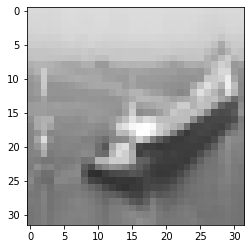

In [118]:
plt.imshow(x_test_scaled[120])

In [119]:
# cross-checking
classes[y_test[120][0]]

'ship'

### Classification report

In [120]:
import warnings
warnings.filterwarnings("ignore")

ann_y_predict = ann.predict(x_test)
ann_y_predict_classes = [np.argmax(element) for element in ann_y_predict]

print("Classification Report: \n", classification_report(y_test, ann_y_predict_classes))

313/313 [==============================] - 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.16      0.94      0.27      1000
           1       0.22      0.30      0.25      1000
           2       0.17      0.30      0.22      1000
           3       0.23      0.19      0.21      1000
           4       0.41      0.01      0.03      1000
           5       0.16      0.01      0.01      1000
           6       0.28      0.01      0.01      1000
           7       0.57      0.02      0.05      1000
           8       0.22      0.00      0.01      1000
           9       0.25      0.00      0.00      1000

    accuracy                           0.18     10000
   macro avg       0.27      0.18      0.11     10000
weighted avg       0.27      0.18      0.11     10000



### Visualizing ANN accuracy

Text(69.0, 0.5, 'Truth')

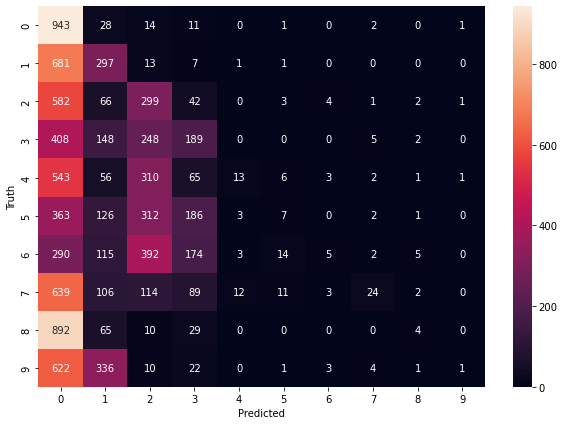

In [121]:
import seaborn as sn
ann_confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions = ann_y_predict_classes)
plt.figure(figsize = (10,7))
sn.heatmap(ann_confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Building CNN with 5 epochs

In [113]:
cnn = keras.Sequential([
        
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
    



cnn.compile (
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

cnn.fit(x_train, y_train_categorical, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.7480 - accuracy: 0.4152
Epoch 2/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2600 - accuracy: 0.5563
Epoch 3/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1042 - accuracy: 0.6147
Epoch 4/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0104 - accuracy: 0.6479
Epoch 5/5
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9418 - accuracy: 0.6722


In [122]:
cnn_y_predict = model.predict(x_test_scaled)
cnn_y_predict

313/313 [==============================] - 4s 12ms/step


array([[0.42774716, 0.58526444, 0.61332285, ..., 0.06072808, 0.60851353,
        0.12308096],
       [0.9161433 , 0.990886  , 0.19925159, ..., 0.06514478, 0.9622079 ,
        0.99066794],
       [0.98257107, 0.98074996, 0.2249138 , ..., 0.16711238, 0.96038866,
        0.95725435],
       ...,
       [0.09470108, 0.17195351, 0.82872367, ..., 0.62978727, 0.37426665,
        0.24432419],
       [0.4881598 , 0.6525648 , 0.68763626, ..., 0.30805075, 0.13345705,
        0.40680802],
       [0.5950061 , 0.49063402, 0.47703853, ..., 0.8739465 , 0.19320355,
        0.48887828]], dtype=float32)

In [125]:
classes[np.argmax(model.predict(x_test_scaled)[1000])]

313/313 [==============================] - 3s 10ms/step


'dog'

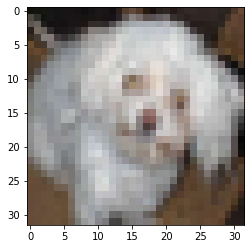

In [126]:
plt.imshow(x_test_scaled[1000])

In [127]:
classes[y_test[1000][0]]

'dog'

In [128]:
import warnings
warnings.filterwarnings("ignore")

cnn_y_predict = ann.predict(x_test)
cnn_y_predict_classes = [np.argmax(element) for element in y_predict]

print("Classification Report: \n", classification_report(y_test, cnn_y_predict_classes))

313/313 [==============================] - 2s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.66      0.53      1000
           1       0.42      0.81      0.55      1000
           2       0.46      0.19      0.27      1000
           3       0.37      0.27      0.31      1000
           4       0.49      0.29      0.37      1000
           5       0.51      0.24      0.33      1000
           6       0.40      0.73      0.52      1000
           7       0.61      0.47      0.53      1000
           8       0.68      0.53      0.59      1000
           9       0.49      0.49      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



### Visualizing CNN accuracy 

Text(69.0, 0.5, 'Truth')

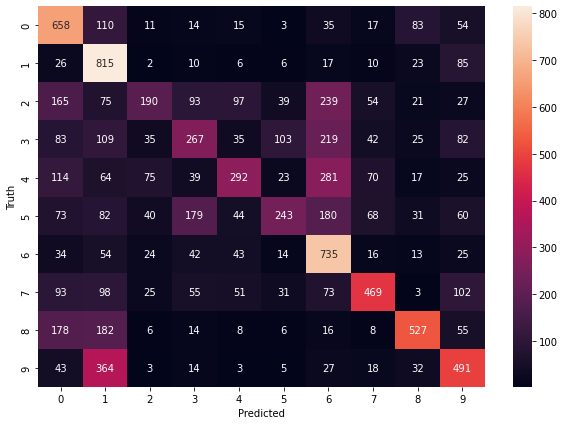

In [129]:
import seaborn as sn
cnn_confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions = cnn_y_predict_classes)
plt.figure(figsize = (10,7))
sn.heatmap(cnn_confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Conclusion: I had trained images using ANN and CNN with equal number of epochs and result i found was CNN performed better than ANN in image classification

                                                                                                      Pranjal Tripathi